In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/MeerutWorking/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df[["Age","EstimatedSalary","Purchased"]]

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.shape

(400, 3)

In [19]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [21]:
X.shape

(400, 2)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

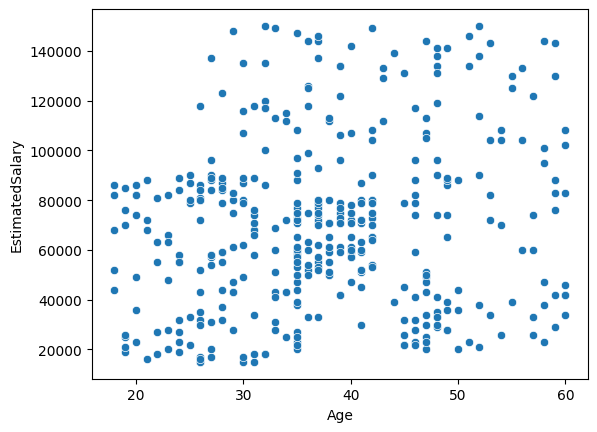

In [35]:
sns.scatterplot(data = df, x=df.iloc[:,0],y=df.iloc[:,1])

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [24]:
model = Sequential()
model.add(Dense(128, activation = "relu", input_dim = 2))
model.add(Dense(1, activation = "sigmoid"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss = "binary_crossentropy", optimizer="Adam",metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 4903.5781 - accuracy: 0.6344 - val_loss: 2194.4119 - val_accuracy: 0.6750
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 1094.4777 - accuracy: 0.5344 - val_loss: 1318.6560 - val_accuracy: 0.3250
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 651.9650 - accuracy: 0.4531 - val_loss: 416.1908 - val_accuracy: 0.6750
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 297.2836 - accuracy: 0.5219 - val_loss: 111.6603 - val_accuracy: 0.3250
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 77.5727 - accuracy: 0.5094 - val_loss: 75.3258 - val_accuracy: 0.6750
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 57.5783 - accuracy: 0.5094 - val_loss: 27.1395 - val_accuracy: 0.3250
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 34.2022 - accuracy: 0.4688 - val_loss: 53.4531 - val_acc

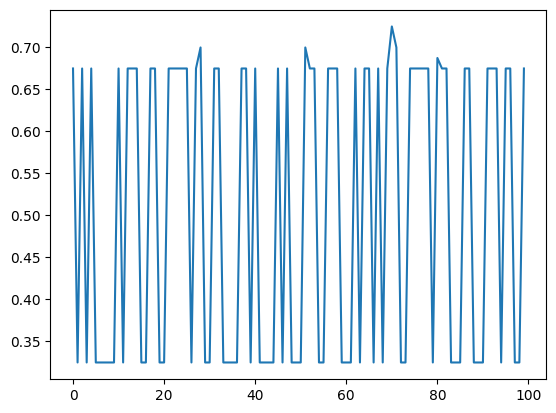

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history["val_accuracy"])
# We can see the validation accuracy is vacilating & is not great only 70%

In [30]:
# After Applying Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled[:5,:]

array([[ 0.70196731, -1.28920196],
       [-0.9554555 , -0.31097586],
       [-0.9554555 ,  0.28188845],
       [ 0.01949909,  1.26011455],
       [ 0.99445369,  2.03083815]])

<Axes: >

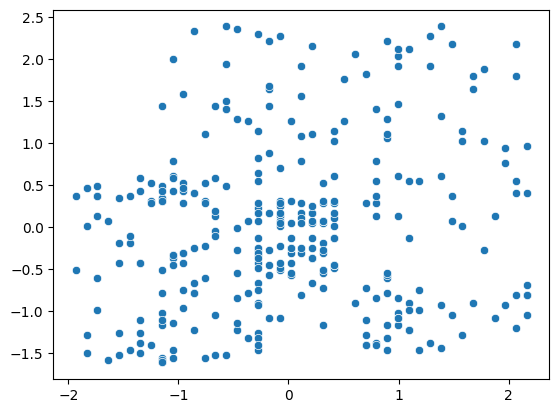

In [37]:
sns.scatterplot(data = X_train_scaled, x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [38]:
# Both the plots scaled & before scaling are identical

In [39]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 46ms/step - loss: 0.6490 - accuracy: 0.7688 - val_loss: 0.6076 - val_accuracy: 0.7375
Epoch 2/100
10/10 [==============================] - 0s 14ms/step - loss: 0.5979 - accuracy: 0.8000 - val_loss: 0.5550 - val_accuracy: 0.7750
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5540 - accuracy: 0.8156 - val_loss: 0.5111 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 0.5170 - accuracy: 0.8438 - val_loss: 0.4732 - val_accuracy: 0.8250
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4857 - accuracy: 0.8469 - val_loss: 0.4401 - val_accuracy: 0.8375
Epoch 6/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4581 - accuracy: 0.8531 - val_loss: 0.4113 - val_accuracy: 0.8375
Epoch 7/100
10/10 [==============================] - 0s 21ms/step - loss: 0.4339 - accuracy: 0.8531 - val_loss: 0.3853 - val_accuracy: 0.8500
Epoch 8

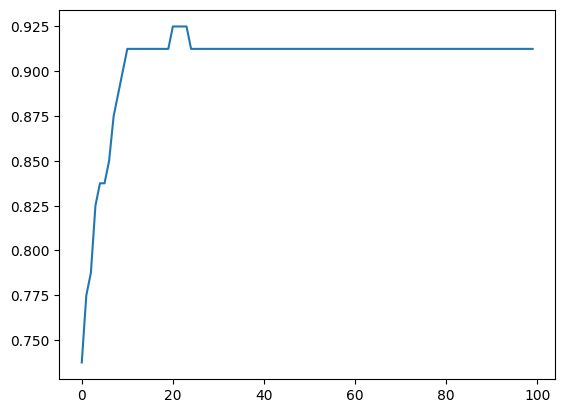

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [ ]:
# Validation accuracy is consistent & accuracy is much better.